# Introduction #

First encountering a new dataset can sometimes feel overwhelming. You might be presented with hundreds or thousands of features without even a description to go by. Where do you even begin?

*Първият контакт с нов набор от данни понякога може да се почувства непосилно. Може да ви бъдат представени стотици или хиляди характеристики, без дори да имате описание. Откъде изобщо започваш?*

A great first step is to construct a ranking with a **feature utility metric**, a function measuring associations between a feature and the target. Then you can choose a smaller set of the most useful features to develop initially and have more confidence that your time will be well spent.

*Страхотна първа стъпка е да се изгради класиране с показател за полезност на характеристиката, функция, измерваща асоциациите между характеристики и целта. След това можете да изберете по-малък набор от най-полезните характеристики, които да разработите първоначално и да имате повече увереност, че времето ви ще бъде изразходвано добре.*

The metric we'll use is called **_"mutual information"_**. Mutual information is a lot like correlation in that it measures a relationship between two quantities. The advantage of mutual information is that it can detect *any* kind of relationship, while correlation only detects *linear* relationships.

*Метриката, която ще използваме, се нарича **_„взаимна информация“_**. Взаимната информация е много подобна на корелацията, тъй като измерва връзката между две величини. Предимството на взаимната информация е, че може да открие всякакъв вид връзка, докато корелацията открива само линейни връзки.*

*`Mutual information`* is a great general-purpose metric and especially useful at the start of feature development when you might not know what model you'd like to use yet. It is:

*`Взаимната информация` е чудесна метрика с общо предназначение и особено полезна в началото на разработването на характеристики (особено на нови характеристики), когато все още може да не знаете, какъв модел искате да използвате. Тя е:*
- easy to use and interpret/лесна за използване и тълкуване,,
- computationally efficient/изчислително ефективна,
- theoretically well-founded/теоретично обоснована,
- resistant to overfitting/устойчива на "прекомерно настройване", and, и
- able to detect any kind of relationship/в състояние да открие всякакъв вид връзка(взаимодействие)

# Mutual Information(МI) and What it Measures #

Mutual information describes relationships in terms of *uncertainty*. The **mutual information** (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other. If you knew the value of a feature, how much more confident would you be about the target?

*`Взаимната информация` описва отношенията от гледна точка на несигурност*. _**Взаимната информация (MI)**_ *между две величини е мярка за степента, до която познаването на една величина намалява несигурността относно другата. Ако знаехте стойността на дадена функция, колко по-уверени бихте били за целта?*

Here's an example from the *Ames Housing* data. The figure shows the relationship between the exterior quality of a house and the price it sold for. Each point represents a house.

_Ето пример от данните на *`Ames Housing`*. Фигурата показва връзката между външното качество на една къща и цената, на която е продадена. Всяка точка представлява къща._

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/X12ARUK.png" width=400, alt="Four categories of ExterQual: Fair, Typical, Good, Excellent. A scatter plot of SalePrice within each category.">
<figcaption style="textalign: center; font-style: italic"><center>Knowing the exterior quality of a house reduces uncertainty about its sale price.
</center></figcaption>
</figure>

From the figure, we can see that knowing the value of `ExterQual` should make you more certain about the corresponding `SalePrice` -- each category of `ExterQual` tends to concentrate `SalePrice` to within a certain range. The mutual information that `ExterQual` has with `SalePrice` is the average reduction of uncertainty in `SalePrice` taken over the four values of `ExterQual`. Since `Fair` occurs less often than `Typical`, for instance, `Fair` gets less weight in the MI score.

*От фигурата можем да видим, че познаването на стойността на `ExterQual` трябва да ви направи по-сигурни относно съответната `SalePrice` - всяка категория на `ExterQual` има тенденция да концентрира `SalePrice` в рамките на определен диапазон. Взаимната информация, която `ExterQual` има със `SalePrice`, е средното намаление на несигурността в `SalePrice`, взето спрямо четирите стойности на `ExterQual`. Тъй като `Fair` се среща по-рядко от Типично, например `Fair` получава по-малка тежест в резултата на MI.*

(Technical note: What we're calling uncertainty is measured using a quantity (величина) from information theory known as `"entropy"`. The _**entropy**_ of a variable means roughly: "how many yes-or-no questions you would need to describe an occurance of that variable, on average." The more questions you have to ask, the more uncertain you must be about the variable. `Mutual information` is how many questions you expect the feature to answer about the target.)

*(Техн. бележка: Това, което наричаме несигурност, се измерва с помощта на величина от теорията на информацията, известна като „ентропия“. Ентропията на една променлива означава грубо: „колко въпроса с `да` или `не` ще ви трябват средно, за да опишете събитието на този променлива." Колкото повече въпроси трябва да зададете, толкова по-несигурен сте относно променливата.`Взаимната информация` е, на колко въпроса очаквате да отговори функцията относно целта.)*

# Interpreting Mutual Information(MI) Scores #

The least possible `mutual information` between quantities is 0.0. When MI is zero, the quantities are independent: neither can tell you anything about the other. Conversely, in theory there's no upper bound to what MI can be. In practice though values above 2.0 or so are uncommon. (`Mutual information` is a logarithmic quantity, so it increases very slowly.)

_Най-малко възможната `взаимна информация` между количествата е 0,0. Когато MI е нула, количествата са независими: нито едното не може да каже нищо за другото. Обратно, на теория няма горна граница на това какво може да бъде MI. На практика обаче стойности над 2,0 или нещо повече са необичайни. (`Взаимната информация` е логаритмична величина, така че нараства много бавно.)_

The next figure will give you an idea of how MI values correspond to the kind and degree of association a feature has with the target.

*Следващата фигура ще ви даде представа как стойностите на MI съответстват на вида и степента на асоцииране на функцията с целта.*

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/Dt75E1f.png" width=800, alt="">
<figcaption style="textalign: center; font-style: italic"><center><strong>Left:</strong> Mutual information increases as the dependence between feature and target becomes tighter(по-тясна). <strong>Right:</strong> Mutual information can capture any kind of association (*not just linear, like correlation*.)
</center></figcaption>
</figure>

Here are some things to remember when applying mutual information:
- MI can help you to understand the *relative potential* of a feature as a predictor of the target, considered by itself.
  * _MI може да ви помогне да разберете *относителния потенциал* на дадена характеристика като предиктор(предсказател) на целта, разглеждана сама по себе си._

- It's possible for a feature to be very informative when interacting with other features, but not so informative all alone. MI *can't detect interactions* between features. It is a **univariate** metric.

  * _Възможно е дадена характеристика да бъде много информативна, когато взаимодейства с други характеристика, но не толкова информативна сама по себе си. MI *не може да открие взаимодействия* между функции. Това е **едномерен** показател._


- The *actual* usefulness of a feature *depends on the model you use it with*. A feature is only useful to the extent that its relationship with the target is one your model can learn. Just because a feature has a high MI score doesn't mean your model will be able to do anything with that information. You may need to transform the feature first to expose the association.

  * _*Реалната* полезност на дадена характеристика *зависи от модела, с който я използвате*. Дадена характеристика е полезна само до степента, в която нейната връзка с целта е тази, която вашият модел може да научи. Това, че дадена характеристика има висок MI резултат, не означава, че вашият модел ще може да направи нещо с тази информация. Може да се наложи първо да трансформирате характеристика, за да разкриете асоциацията._

# Example - 1985 Automobiles #

The [*Automobile*](https://www.kaggle.com/toramky/automobile-dataset) dataset consists of 193 cars from the 1985 model year. The goal for this dataset is to predict a car's `price` (the target) from 23 of the car's features, such as `make`, `body_style`, and `horsepower`. In this example, we'll rank the features with mutual information and investigate the results by data visualization.

_[*Automobile*](https://www.kaggle.com/toramky/automobile-dataset) наборът от данни се състои от 193 автомобила от моделната година 1985. Целта на този набор от данни е да се предскаже „цената“ на автомобила (цел) въз основа на 23 от характеристиките на автомобила, като „марка“, „тип на каросерия“ и „конски сили“. В този пример ще класираме характеристиките с взаимна информация и ще проучим резултатите чрез визуализация на данни._

This hidden cell imports some libraries and loads the dataset.
_Тази скрита клетка импортира някои библиотеки и зарежда набора от данни._

In [2]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")

df = pd.read_csv("../input/fe-course-data/autos.csv")
df

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_32/94396995.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-1,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9,114,5400,23,28,16845
189,-1,volvo,gas,turbo,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8,160,5300,19,25,19045
190,-1,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8,134,5500,18,23,21485
191,-1,volvo,diesel,turbo,4,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23,106,4800,26,27,22470


The scikit-learn algorithm for MI treats discrete features differently from continuous features. Consequently, you need to tell it which are which. As a rule of thumb, anything that *must* have a `float` dtype is *not* discrete. Categoricals (`object` or `categorial` dtype) can be treated as discrete by giving them a label encoding. (You can review label encodings in our [Categorical Variables](http://www.kaggle.com/alexisbcook/categorical-variables) lesson.)

_Алгоритъмът на scikit-learn за MI третира дискретните характеристики по различен начин от непрекъснатите характеристики. Следователно, трябва да му кажете, кои кои са. Като основно правило, всичко, което има dtype `float`, *не е* дискретно. Категорийните („обект“ или „категориен“ dtype) могат да се третират като дискретни, като им се даде кодиране на етикет. (Можете да прегледате кодировките на етикетите в нашия урок [Категорични променливи](http://www.kaggle.com/alexisbcook/categorical-variables).)_


In [3]:
X = df.copy()
y = X.pop("price")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes 
# (double-check this before using MI!)
discrete_features = X.dtypes == int

In [16]:
# My
X_1 = df.copy()
X_1

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-1,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9,114,5400,23,28,16845
189,-1,volvo,gas,turbo,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8,160,5300,19,25,19045
190,-1,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8,134,5500,18,23,21485
191,-1,volvo,diesel,turbo,4,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23,106,4800,26,27,22470


In [20]:
# My
X_1.make.factorize()

(array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
         3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  6,  6,  7,  7,  7,  8,  8,  8,  8,  8,
         8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
        15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
        17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
        18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
        19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20,
        20, 20, 20, 20, 20, 20]),
 Index(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
        'jaguar', 'mazda', 'mercedes-benz', 'mercury

In [8]:
discrete_features

symboling             True
make                  True
fuel_type             True
aspiration            True
num_of_doors          True
body_style            True
drive_wheels          True
engine_location       True
wheel_base           False
length               False
width                False
height               False
curb_weight           True
engine_type           True
num_of_cylinders      True
engine_size           True
fuel_system           True
bore                 False
stroke               False
compression_ratio     True
horsepower            True
peak_rpm              True
city_mpg              True
highway_mpg           True
dtype: bool

In [18]:
X

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,3,0,0,0,2,0,0,0,88.6,168.8,...,4,130,0,3.47,2.68,9,111,5000,21,27
1,3,0,0,0,2,0,0,0,88.6,168.8,...,4,130,0,3.47,2.68,9,111,5000,21,27
2,1,0,0,0,2,1,0,0,94.5,171.2,...,6,152,0,2.68,3.47,9,154,5000,19,26
3,2,1,0,0,4,2,1,0,99.8,176.6,...,4,109,0,3.19,3.40,10,102,5500,24,30
4,2,1,0,0,4,2,2,0,99.4,176.6,...,5,136,0,3.19,3.40,8,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-1,20,0,0,4,2,0,0,109.1,188.8,...,4,141,0,3.78,3.15,9,114,5400,23,28
189,-1,20,0,1,4,2,0,0,109.1,188.8,...,4,141,0,3.78,3.15,8,160,5300,19,25
190,-1,20,0,0,4,2,0,0,109.1,188.8,...,6,173,0,3.58,2.87,8,134,5500,18,23
191,-1,20,1,1,4,2,0,0,109.1,188.8,...,6,145,5,3.01,3.40,23,106,4800,26,27


Scikit-learn has two mutual information metrics in its `feature_selection` module: one for real-valued targets (`mutual_info_regression`) and one for categorical targets (`mutual_info_classif`). Our target, `price`, is real-valued. The next cell computes the MI scores for our features and wraps them up in a nice dataframe.

In [4]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

curb_weight          1.468438
highway_mpg          0.947813
length               0.608800
bore                 0.502011
stroke               0.392372
num_of_cylinders     0.331096
compression_ratio    0.133296
fuel_type            0.047279
Name: MI Scores, dtype: float64

And now a bar plot to make comparisions easier:

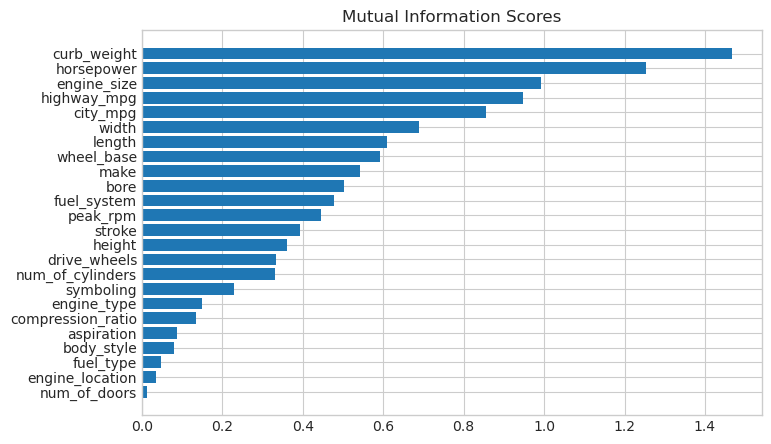

In [5]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

Data visualization is a great follow-up to a utility ranking. Let's take a closer look at a couple of these.

As we might expect, the high-scoring `curb_weight` feature exhibits a strong relationship with `price`, the target.


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


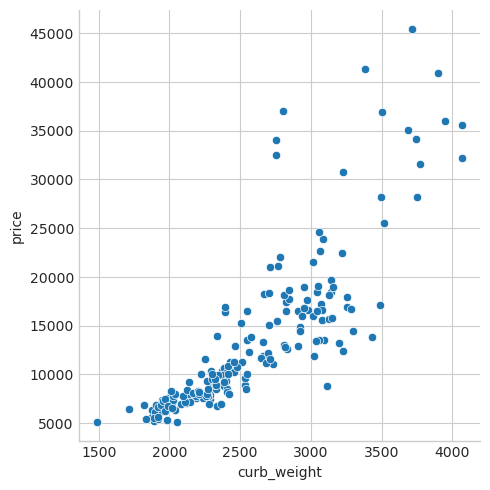

In [6]:
sns.relplot(x="curb_weight", y="price", data=df);

The `fuel_type` feature has a fairly low MI score, but as we can see from the figure, it clearly separates two `price` populations with different trends within the `horsepower` feature. This indicates that `fuel_type` contributes an interaction effect and might not be unimportant after all. Before deciding a feature is unimportant from its MI score, it's good to investigate any possible interaction effects -- domain knowledge can offer a lot of guidance here.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


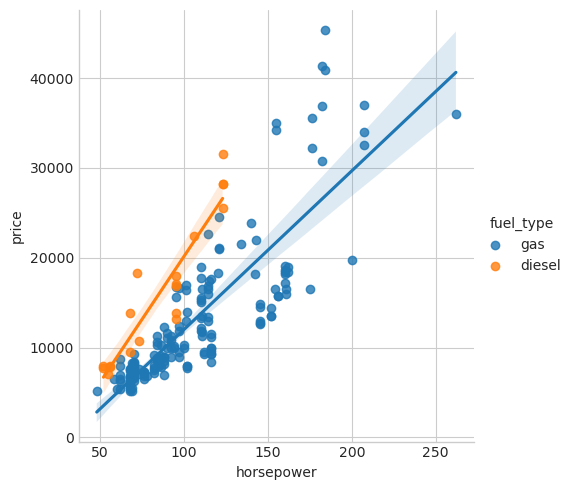

In [7]:
sns.lmplot(x="horsepower", y="price", hue="fuel_type", data=df);

Data visualization is a great addition to your feature-engineering toolbox. Along with utility metrics like mutual information, visualizations like these can help you discover important relationships in your data. Check out our [Data Visualization](https://www.kaggle.com/learn/data-visualization) course to learn more!

# Your Turn #

[**Rank the features**](https://www.kaggle.com/kernels/fork/14393925) of the *Ames Housing* dataset and choose your first set of features to start developing.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/feature-engineering/discussion) to chat with other learners.*